<a href="https://colab.research.google.com/github/Meta-user-byte/Brainathon-2025-CDAC/blob/main/QuanBrainathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pennylane tensorflow torch scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt


In [4]:
from google.colab import files
import zipfile
import os

# Upload the ZIP file
uploaded = files.upload()

# Extract the ZIP file
with zipfile.ZipFile("/content/Quantum_Brainathon-2025_Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

# List the extracted folders
extracted_folders = os.listdir("/content/")
print("Extracted Folders:", extracted_folders)



Saving Quantum_Brainathon-2025_Dataset.zip to Quantum_Brainathon-2025_Dataset.zip
Extracted Folders: ['.config', 'Quantum_Brainathon-2025_Dataset', 'Quantum_Brainathon-2025_Dataset.zip', 'sample_data']


In [5]:
import os

# List files inside the extracted dataset folder
dataset_path = "/content/Quantum_Brainathon-2025_Dataset"
files_in_dataset = os.listdir(dataset_path)
print("Files and folders inside Quantum_Brainathon-2025_Dataset:", files_in_dataset)


Files and folders inside Quantum_Brainathon-2025_Dataset: ['Subject_10', 'Subject_2', 'Subject_5', 'Subject_19', 'Subject_9', 'Subject_24', 'Subject_15', 'Subject_14', 'Subject_3', 'Subject_18', 'Subject_4', 'Subject_1', 'Subject_13', 'Subject_22', 'Subject_6', 'Subject_21', 'Subject_8', 'Subject_17', 'Subject_20', 'Subject_7', 'Subject_12', 'Subject_11', 'Subject_16', 'Subject_23']


In [6]:
subject_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
print("Subject folders found:", subject_folders)

# Process each subject folder
for subject_folder in subject_folders:
    subject_path = os.path.join(dataset_path, subject_folder)
    csv_files = [f for f in os.listdir(subject_path) if f.endswith('.csv')]
    print(f"\nProcessing files for {subject_folder}: {len(csv_files)} files found.")

    for csv_file in csv_files:
        file_path = os.path.join(subject_path, csv_file)
        print(f"  Processing {csv_file}")
        data = pd.read_csv(file_path)
        print(data.head())



Subject folders found: ['Subject_10', 'Subject_2', 'Subject_5', 'Subject_19', 'Subject_9', 'Subject_24', 'Subject_15', 'Subject_14', 'Subject_3', 'Subject_18', 'Subject_4', 'Subject_1', 'Subject_13', 'Subject_22', 'Subject_6', 'Subject_21', 'Subject_8', 'Subject_17', 'Subject_20', 'Subject_7', 'Subject_12', 'Subject_11', 'Subject_16', 'Subject_23']

Processing files for Subject_10: 12 files found.
  Processing Subject_10_task-switching_paradigm_markers.csv
      timestamp                                             marker
0  1.311690e+06  Paradigm_Start_Task-Switching Paradigm_Subject_10
1  1.311690e+06              TaskSwitch_Target_High/Low_Subject_10
2  1.311691e+06                           Missed_Target_Subject_10
3  1.311691e+06                           Missed_Target_Subject_10
4  1.311691e+06                           Missed_Target_Subject_10
  Processing Subject_10_task-switching_paradigm_eeg.csv
      timestamp        Fp1       Fp2         F3         Fz         F4  \
0  1.311

In [7]:
from scipy.signal import butter, lfilter, welch
import numpy as np

# Bandpass filter for EEG signals (0.5–50 Hz)
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut=0.5, highcut=50.0, fs=250, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return lfilter(b, a, data)

def extract_features(eeg_data, fs=250):
    features = {}
    for channel in eeg_data.columns:
        # Convert column to numeric, ignoring non-numeric values
        signal = pd.to_numeric(eeg_data[channel], errors='coerce').fillna(0).values

        # Apply bandpass filter
        filtered_signal = bandpass_filter(signal)

        # Time-domain features
        features[f'{channel}_mean'] = np.mean(filtered_signal)
        features[f'{channel}_std'] = np.std(filtered_signal)
        features[f'{channel}_ptp'] = np.ptp(filtered_signal)  # Peak-to-peak amplitude

        # Frequency-domain features (Power Spectral Density)
        freqs, psd = welch(filtered_signal, fs, nperseg=min(256, len(filtered_signal)))
        features[f'{channel}_alpha_power'] = np.sum(psd[(freqs >= 8) & (freqs <= 13)])
        features[f'{channel}_beta_power'] = np.sum(psd[(freqs >= 13) & (freqs <= 30)])
        features[f'{channel}_theta_power'] = np.sum(psd[(freqs >= 4) & (freqs <= 8)])

    return features



In [8]:
all_features = []
labels = []  # Replace this with actual labels from marker files

for subject_folder in subject_folders:
    subject_path = os.path.join(dataset_path, subject_folder)
    csv_files = [f for f in os.listdir(subject_path) if f.endswith('.csv')]

    for csv_file in csv_files:
        file_path = os.path.join(subject_path, csv_file)
        print(f"Processing {csv_file}")

        # Load the EEG data
        eeg_data = pd.read_csv(file_path)

        # Extract features
        features = extract_features(eeg_data)
        all_features.append(features)

        # Append dummy labels for now (replace with real labels later)
        labels.append(0)  # Example: Replace with actual labels from marker files



Processing Subject_10_task-switching_paradigm_markers.csv
Processing Subject_10_task-switching_paradigm_eeg.csv
Processing Subject_10_stroop_task_eeg.csv
Processing Subject_10_stroop_task_markers.csv
Processing Subject_10_oddball_paradigm_markers.csv
Processing Subject_10_baseline_eyesopen_markers.csv
Processing Subject_10_baseline_eyesopen_eeg.csv
Processing Subject_10_dual-task_paradigm_markers.csv
Processing Subject_10_baseline_eyesclosed_markers.csv
Processing Subject_10_baseline_eyesclosed_eeg.csv
Processing Subject_10_oddball_paradigm_eeg.csv
Processing Subject_10_dual-task_paradigm_eeg.csv
Processing Subject_2_task-switching_paradigm_markers.csv
Processing Subject_2_dual-task_paradigm_eeg.csv
Processing Subject_2_oddball_paradigm_markers.csv
Processing Subject_2_baseline_eyesclosed_eeg.csv
Processing Subject_2_dual-task_paradigm_markers.csv
Processing Subject_2_baseline_eyesopen_markers.csv
Processing Subject_2_oddball_paradigm_eeg.csv
Processing Subject_2_stroop_task_eeg.csv
Pr

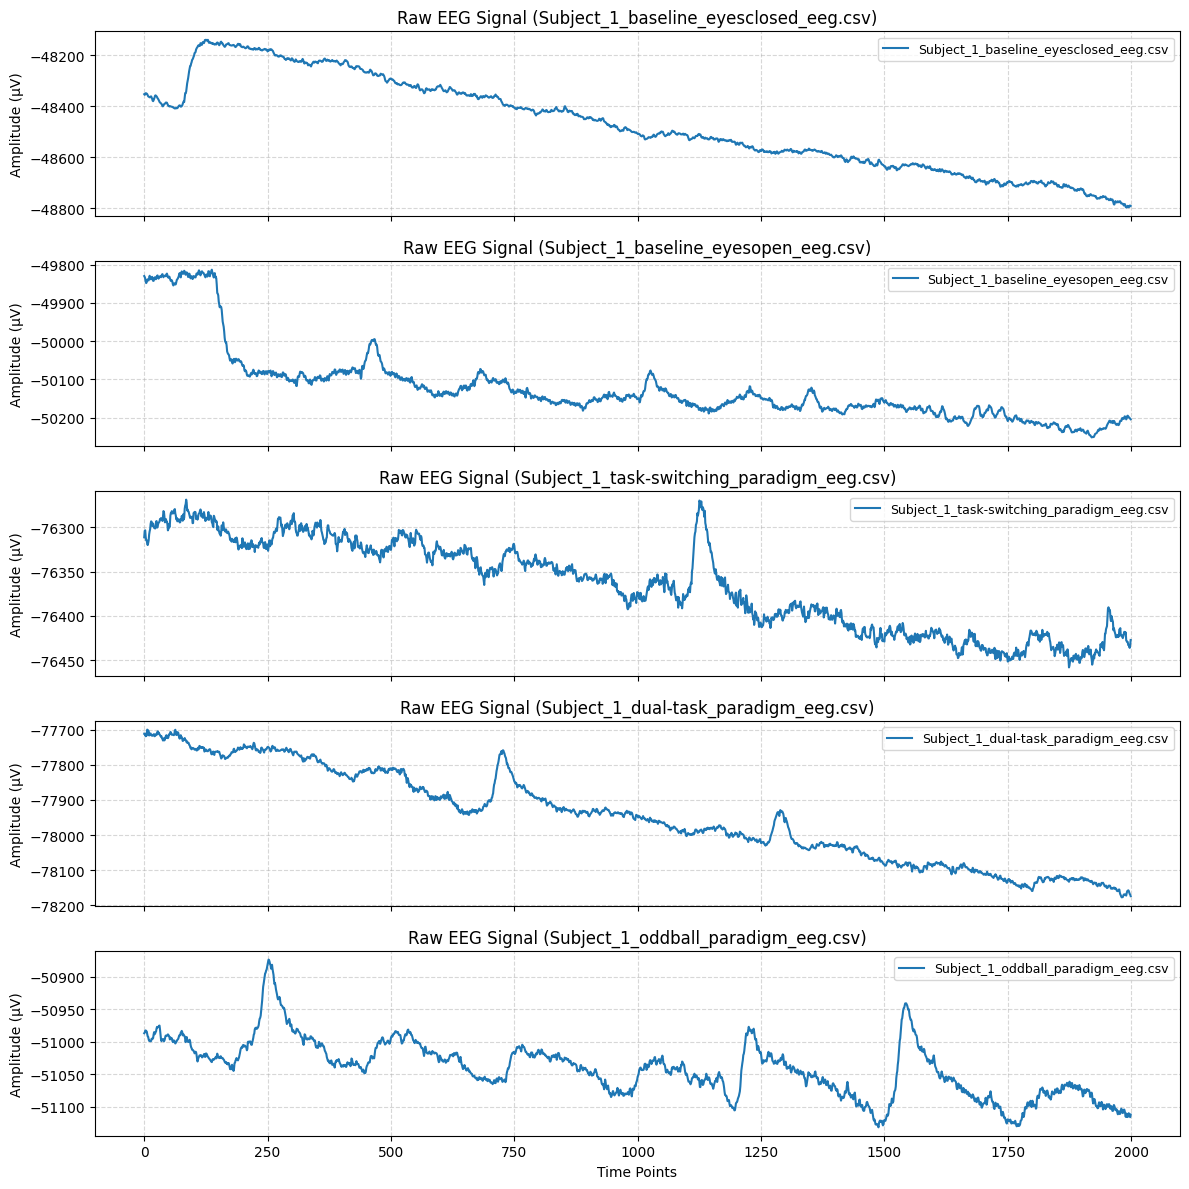

In [9]:
import matplotlib.pyplot as plt

# Define EEG paradigms to compare
paradigms = [
    "Subject_1_baseline_eyesclosed_eeg.csv",
    "Subject_1_baseline_eyesopen_eeg.csv",
    "Subject_1_task-switching_paradigm_eeg.csv",
    "Subject_1_dual-task_paradigm_eeg.csv",
    "Subject_1_oddball_paradigm_eeg.csv"
]

# Number of paradigms (for subplots)
num_paradigms = len(paradigms)

# Create a figure with multiple subplots (one per paradigm)
fig, axes = plt.subplots(num_paradigms, 1, figsize=(12, 12), sharex=True)

for i, paradigm in enumerate(paradigms):
    file_path = f"/content/Quantum_Brainathon-2025_Dataset/Subject_1/{paradigm}"
    eeg_data = pd.read_csv(file_path)

    # Ensure selection of actual EEG channel, ignoring timestamps
    eeg_columns = eeg_data.select_dtypes(include=['float64', 'int64']).columns
    if len(eeg_columns) > 1 and "timestamp" in eeg_columns[0].lower():
        eeg_channel = eeg_columns[1]  # Select the second column if the first is a timestamp
    else:
        eeg_channel = eeg_columns[0]  # Select first available EEG channel

    # Extract EEG signal
    eeg_signal = eeg_data[eeg_channel].values  # Raw EEG signal

    # Plot EEG signal in a separate subplot
    axes[i].plot(eeg_signal[:2000], label=paradigm, linewidth=1.5)
    axes[i].set_title(f"Raw EEG Signal ({paradigm})", fontsize=12)
    axes[i].set_ylabel("Amplitude (µV)", fontsize=10)
    axes[i].legend(loc="upper right", fontsize=9)
    axes[i].grid(True, linestyle="--", alpha=0.5)

# Common x-label for all subplots
axes[-1].set_xlabel("Time Points", fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [10]:
import matplotlib.pyplot as plt
import os
import pandas as pd

# Define the dataset path
dataset_path = "/content/Quantum_Brainathon-2025_Dataset"

# Get a list of subject folders
subject_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

# Define paradigms to compare
paradigms = [
    "baseline_eyesclosed_eeg.csv",
    "baseline_eyesopen_eeg.csv",
    "task-switching_paradigm_eeg.csv",
    "dual-task_paradigm_eeg.csv",
    "oddball_paradigm_eeg.csv"
]

# Group subjects into sets of 6 to reduce number of figures
group_size = 6
subject_groups = [subject_folders[i:i + group_size] for i in range(0, len(subject_folders), group_size)]

# Loop through groups of subjects
for group_idx, subject_group in enumerate(subject_groups):
    fig, axes = plt.subplots(len(paradigms), 1, figsize=(12, 15), sharex=True)

    # Track if we plotted anything
    plotted_anything = False

    # Loop through each paradigm
    for i, paradigm in enumerate(paradigms):
        for subject in subject_group:
            file_path = os.path.join(dataset_path, subject, f"{subject}_{paradigm}")

            if os.path.exists(file_path):
                eeg_data = pd.read_csv(file_path)

                # Check if there are numeric EEG columns
                eeg_columns = eeg_data.select_dtypes(include=['float64', 'int64']).columns
                if len(eeg_columns) == 0:
                    print(f"Skipping {file_path} (No valid EEG columns found)")
                    continue  # Skip this file if no valid columns

                eeg_channel = eeg_columns[0]  # Select first available EEG channel

                eeg_signal = eeg_data[eeg_channel].values[:2000]  # Limit to first 2000 points

                axes[i].plot(eeg_signal, label=subject, linewidth=1.2)
                plotted_anything = True  # Mark that we plotted at least one subject

        axes[i].set_title(f"EEG Signals for {paradigm}", fontsize=12)
        axes[i].set_ylabel("Amplitude (µV)", fontsize=10)
        axes[i].legend(loc="upper right", fontsize=9)
        axes[i].grid(True, linestyle="--", alpha=0.5)

    if plotted_anything:
        # Set common xlabel
        axes[-1].set_xlabel("Time Points", fontsize=10)
        plt.suptitle(f"Comparison of EEG Signals for Subject Group {group_idx+1}", fontsize=14)

        # Save the figure
        plt.savefig(f"/content/EEG_Comparison_Group_{group_idx+1}.png", dpi=300)
        plt.close()
        print(f"Saved: EEG_Comparison_Group_{group_idx+1}.png")
    else:
        print(f"Skipped Group {group_idx+1}: No valid EEG data found.")

print("All subject EEG plots saved successfully!")


Saved: EEG_Comparison_Group_1.png
Saved: EEG_Comparison_Group_2.png
Saved: EEG_Comparison_Group_3.png
Saved: EEG_Comparison_Group_4.png
All subject EEG plots saved successfully!


In [ ]:
import imageio
import glob

images = []
for file in sorted(glob.glob("/content/EEG_Comparison_Group_*.png")):
    images.append(imageio.imread(file))

imageio.mimsave('/content/EEG_Comparison_Animation.gif', images, duration=1)


<ipython-input-12-c56ece890d7c>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file))


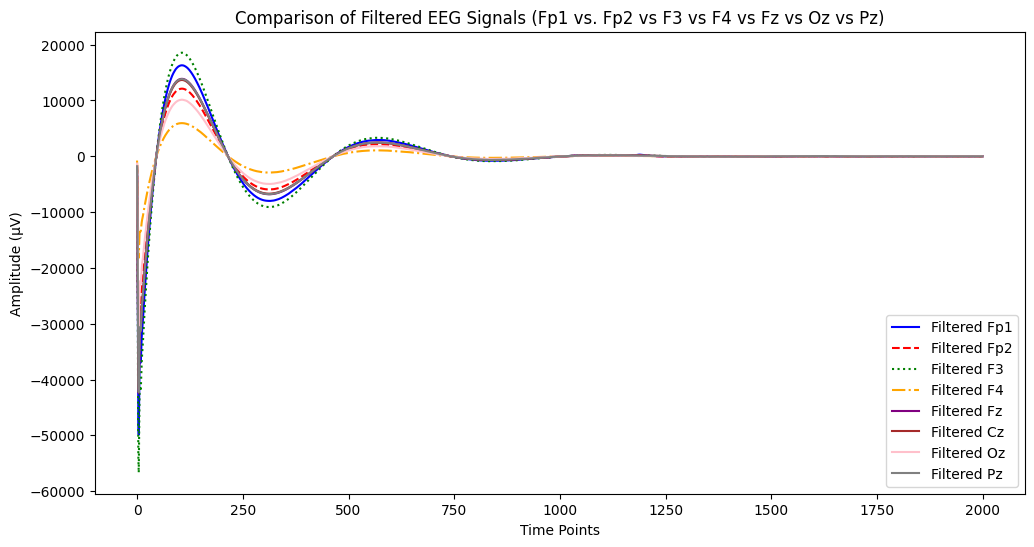

In [12]:
plt.figure(figsize=(12, 6))

# Apply bandpass filter to both Fp1 and Fp2
if 'Fp1' in eeg_data.columns and 'Fp2' in eeg_data.columns and 'F3' in eeg_data.columns and 'F4' in eeg_data.columns and 'Fz' in eeg_data.columns and 'Cz' in eeg_data.columns and 'Oz' in eeg_data.columns and 'Pz' in eeg_data.columns:
    filtered_fp1 = bandpass_filter(eeg_data['Fp1'], 0.5, 50.0, 250)
    filtered_fp2 = bandpass_filter(eeg_data['Fp2'], 0.5, 50.0, 250)
    filtered_f3 = bandpass_filter(eeg_data['F3'], 0.5, 50.0, 250)
    filtered_f4 = bandpass_filter(eeg_data['F4'], 0.5, 50.0, 250)
    filtered_fz = bandpass_filter(eeg_data['Fz'], 0.5, 50.0, 250)
    filtered_cz = bandpass_filter(eeg_data['Cz'], 0.5, 50.0, 250)
    filtered_oz = bandpass_filter(eeg_data['Oz'], 0.5, 50.0, 250)
    filtered_pz = bandpass_filter(eeg_data['Pz'], 0.5, 50.0, 250)

    # Plot both channels on the same graph
    plt.plot(filtered_fp1[:2000], label='Filtered Fp1', color='blue')
    plt.plot(filtered_fp2[:2000], label='Filtered Fp2', color='red', linestyle='dashed')
    plt.plot(filtered_f3[:2000], label='Filtered F3', color='green', linestyle='dotted')
    plt.plot(filtered_f4[:2000], label='Filtered F4', color='orange', linestyle='dashdot')
    plt.plot(filtered_fz[:2000], label='Filtered Fz', color='purple', linestyle='solid')
    plt.plot(filtered_cz[:2000], label='Filtered Cz', color='brown', linestyle='solid')
    plt.plot(filtered_oz[:2000], label='Filtered Oz', color='pink', linestyle='solid')
    plt.plot(filtered_pz[:2000], label='Filtered Pz', color='gray', linestyle='solid')

    # Graph settings
    plt.title("Comparison of Filtered EEG Signals (Fp1 vs. Fp2 vs F3 vs F4 vs Fz vs Oz vs Pz)")
    plt.xlabel("Time Points")
    plt.ylabel("Amplitude (µV)")
    plt.legend()
    plt.show()
else:
    print("Fp1 or Fp2 column not found in the EEG file.")



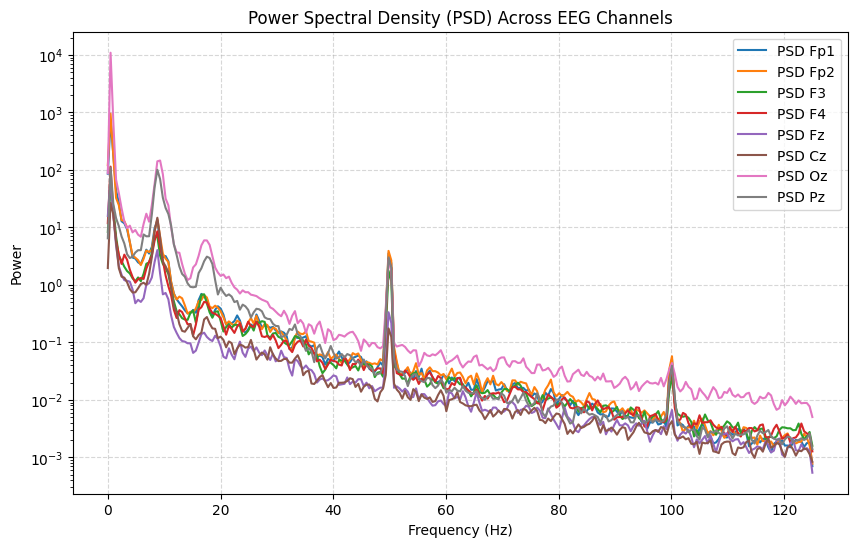

In [13]:
from scipy.signal import welch

# Define EEG channels to compare
channels = ["Fp1", "Fp2", "F3", "F4", "Fz", "Cz", "Oz", "Pz"]
fs = 250  # Sampling frequency in Hz

# Load EEG data
file_path = "/content/Quantum_Brainathon-2025_Dataset/Subject_1/Subject_1_baseline_eyesclosed_eeg.csv"
eeg_data = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))

# Compute and plot PSD for each channel
for channel in channels:
    if channel in eeg_data.columns:
        # Extract EEG signal
        signal = eeg_data[channel].values

        # Compute PSD using Welch’s method
        freqs, psd = welch(signal, fs=fs, nperseg=512)

        # Plot PSD on a logarithmic scale
        plt.semilogy(freqs, psd, label=f"PSD {channel}")

# Graph settings
plt.title("Power Spectral Density (PSD) Across EEG Channels")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [ ]:
import pandas as pd

# Create DataFrame from all_features list
feature_df = pd.DataFrame(all_features)

# Display the first few rows of feature_df
print(feature_df.head())


   timestamp_mean  timestamp_std  timestamp_ptp  timestamp_alpha_power  \
0   -35920.545514  362219.007668   1.377671e+06           2.957799e+06   
1   -69349.012909  344518.672321   1.378540e+06           1.191762e+06   
2        0.001470   56737.833026   1.377616e+06           2.787795e+03   
3   147870.542756  104184.889908   2.083698e+05           0.000000e+00   
4   -78110.508511  334591.893892   1.378031e+06           1.204828e+06   

   timestamp_beta_power  timestamp_theta_power  marker_mean  marker_std  \
0         523711.738735           7.005594e+07          0.0         0.0   
1         138666.461080           8.159085e+07          0.0         0.0   
2            273.839391           8.734439e+04          NaN         NaN   
3              0.000000           0.000000e+00          0.0         0.0   
4         141393.181587           8.547040e+07          0.0         0.0   

   marker_ptp  marker_alpha_power  ...        Pz_ptp  Pz_alpha_power  \
0         0.0                 0.

new

In [14]:
# Step 2: Utility Functions for Feature Extraction

import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter, welch

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut=0.5, highcut=50.0, fs=250, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return lfilter(b, a, data)

def extract_features(eeg_data, fs=250):
    """
    Extract time-domain and frequency-domain features from each channel (column) in eeg_data.
    """
    features = []
    for column in eeg_data.columns:
        # Convert column to numeric safely
        signal = pd.to_numeric(eeg_data[column], errors='coerce').fillna(0).values
        # Apply bandpass
        filtered_signal = bandpass_filter(signal, lowcut=0.5, highcut=50.0, fs=fs)

        # Time-Domain
        mean_val = np.mean(filtered_signal)
        std_val  = np.std(filtered_signal)
        ptp_val  = np.ptp(filtered_signal)

        # Frequency-Domain (Welch PSD)
        freqs, psd = welch(filtered_signal, fs=fs, nperseg=min(256, len(filtered_signal)))
        alpha_power = np.sum(psd[(freqs >= 8) & (freqs <= 13)])
        beta_power  = np.sum(psd[(freqs >= 13) & (freqs <= 30)])
        theta_power = np.sum(psd[(freqs >= 4) & (freqs <= 8)])

        # Combine features from this channel
        features.extend([mean_val, std_val, ptp_val, alpha_power, beta_power, theta_power])
    return np.array(features)


In [15]:
# Step 3: Build the Dataset (X, y)

import os
import pandas as pd

dataset_path = "/content/Quantum_Brainathon-2025_Dataset"

# Define how we'll label each file (dummy example: if "task-switching" in file, label=1 else 0)
def assign_label(paradigm_filename):
    if "task-switching" in paradigm_filename:
        return 1
    else:
        return 0

X_list = []
y_list = []

# Define relevant paradigms (or you can collect all .csv files)
paradigms = [
    "baseline_eyesclosed_eeg.csv",
    "baseline_eyesopen_eeg.csv",
    "task-switching_paradigm_eeg.csv",
    "dual-task_paradigm_eeg.csv",
    "oddball_paradigm_eeg.csv"
]

subject_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

for subject in subject_folders:
    for paradigm in paradigms:
        file_path = os.path.join(dataset_path, subject, f"{subject}_{paradigm}")
        if os.path.exists(file_path):
            print("Extracting features from:", file_path)
            eeg_data = pd.read_csv(file_path)
            feature_vec = extract_features(eeg_data)  # from Step 2
            X_list.append(feature_vec)

            label_val = assign_label(paradigm)
            y_list.append(label_val)

# Convert to numpy arrays
import numpy as np
X = np.array(X_list)
y = np.array(y_list)

print("Raw X shape:", X.shape)  # (num_samples, features_per_file)
print("Raw y shape:", y.shape)  # (num_samples,)
print("Class distribution:", np.bincount(y))


Extracting features from: /content/Quantum_Brainathon-2025_Dataset/Subject_10/Subject_10_baseline_eyesclosed_eeg.csv
Extracting features from: /content/Quantum_Brainathon-2025_Dataset/Subject_10/Subject_10_baseline_eyesopen_eeg.csv
Extracting features from: /content/Quantum_Brainathon-2025_Dataset/Subject_10/Subject_10_task-switching_paradigm_eeg.csv
Extracting features from: /content/Quantum_Brainathon-2025_Dataset/Subject_10/Subject_10_dual-task_paradigm_eeg.csv
Extracting features from: /content/Quantum_Brainathon-2025_Dataset/Subject_10/Subject_10_oddball_paradigm_eeg.csv
Extracting features from: /content/Quantum_Brainathon-2025_Dataset/Subject_2/Subject_2_baseline_eyesclosed_eeg.csv
Extracting features from: /content/Quantum_Brainathon-2025_Dataset/Subject_2/Subject_2_baseline_eyesopen_eeg.csv
Extracting features from: /content/Quantum_Brainathon-2025_Dataset/Subject_2/Subject_2_task-switching_paradigm_eeg.csv
Extracting features from: /content/Quantum_Brainathon-2025_Dataset/Sub

In [16]:
# Step 4: SMOTE (Class Balancing) and PCA (Reduce to <= 32 features for quantum circuit)

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# 4a) Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("After SMOTE, class distribution:", np.bincount(y_smote))
print("X_smote shape:", X_smote.shape)

# 4b) PCA to reduce to 18 qubits (or 32 if you want the max qubits)
n_qubits = 18
pca = PCA(n_components=n_qubits)
X_pca = pca.fit_transform(X_smote)

print("PCA shape:", X_pca.shape)


After SMOTE, class distribution: [96 96]
X_smote shape: (192, 54)
PCA shape: (192, 18)


In [17]:
# Step 5: Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_smote, test_size=0.3, random_state=42, stratify=y_smote
)

print("Train X shape:", X_train.shape)
print("Train y shape:", y_train.shape)
print("Test  X shape:", X_test.shape)
print("Test  y shape:", y_test.shape)


Train X shape: (134, 18)
Train y shape: (134,)
Test  X shape: (58, 18)
Test  y shape: (58,)


Epoch 1/20, Loss: 0.6906
Epoch 2/20, Loss: 0.6905
Epoch 3/20, Loss: 0.6905
Epoch 4/20, Loss: 0.6905
Epoch 5/20, Loss: 0.6904
Epoch 6/20, Loss: 0.6904
Epoch 7/20, Loss: 0.6904
Epoch 8/20, Loss: 0.6903
Epoch 9/20, Loss: 0.6903
Epoch 10/20, Loss: 0.6903
Epoch 11/20, Loss: 0.6902
Epoch 12/20, Loss: 0.6902
Epoch 13/20, Loss: 0.6902
Epoch 14/20, Loss: 0.6902
Epoch 15/20, Loss: 0.6901
Epoch 16/20, Loss: 0.6901
Epoch 17/20, Loss: 0.6901
Epoch 18/20, Loss: 0.6900
Epoch 19/20, Loss: 0.6900
Epoch 20/20, Loss: 0.6900


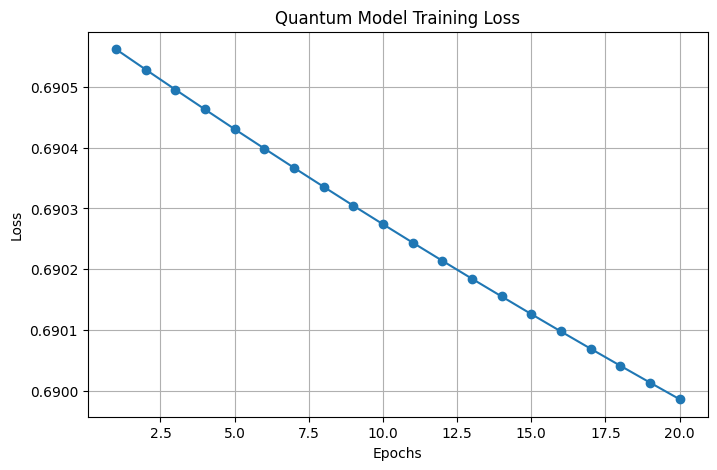

In [22]:
# Step 6: Define and Train the Quantum Model

import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report

# 6a) Define the quantum device
dev = qml.device("default.qubit", wires=n_qubits)

# 6b) Quantum Circuit
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits), rotation="Y")

    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))

    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# 6c) HybridQNN Class
class HybridQNN(nn.Module):
    def __init__(self, n_qubits, n_layers=2):
        super().__init__()
        # Correct the shape of weights (n_layers, n_qubits, 3)
        self.weights = nn.Parameter(0.01 * torch.randn(n_layers, n_qubits, 3))

        # Classical final layer
        self.fc = nn.Linear(n_qubits, 1)

    def forward(self, x):
        outs = []
        for xi in x:
            xi = xi.detach().numpy()  # Convert tensor to numpy for Pennylane

            # Ensure correct weight shape is passed
            qc_out = quantum_circuit(xi, self.weights)
            outs.append(torch.tensor(qc_out, dtype=torch.float32))

        outs = torch.stack(outs)
        return torch.sigmoid(self.fc(outs))

# 6d) Initialize model, criterion, optimizer
model = HybridQNN(n_qubits=n_qubits, n_layers=2)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 6e) Convert training data to Torch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

epochs = 20
loss_values = []

# 6f) Training Loop
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train_torch)        # shape (batch_size, 1)
    loss = criterion(output, y_train_torch)
    loss.backward()
    optimizer.step()
    loss_values.append(loss.item())
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# 6g) Plot Training Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), loss_values, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Quantum Model Training Loss")
plt.grid()
plt.show()


In [23]:
# Step 7: Evaluate the Quantum Model

X_test_torch = torch.tensor(X_test, dtype=torch.float32)

with torch.no_grad():
    y_pred_prob = model(X_test_torch)
    y_pred = (y_pred_prob.numpy() > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
print(f"\nQuantum Model Accuracy: {acc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Quantum Model Accuracy: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.55      0.59        29
           1       0.61      0.69      0.65        29

    accuracy                           0.62        58
   macro avg       0.62      0.62      0.62        58
weighted avg       0.62      0.62      0.62        58



AUC-ROC Score: 0.61


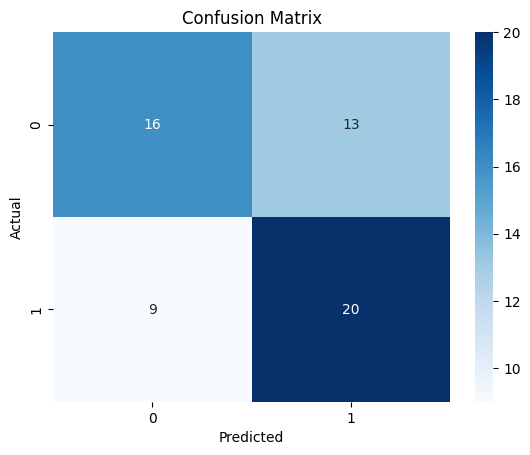

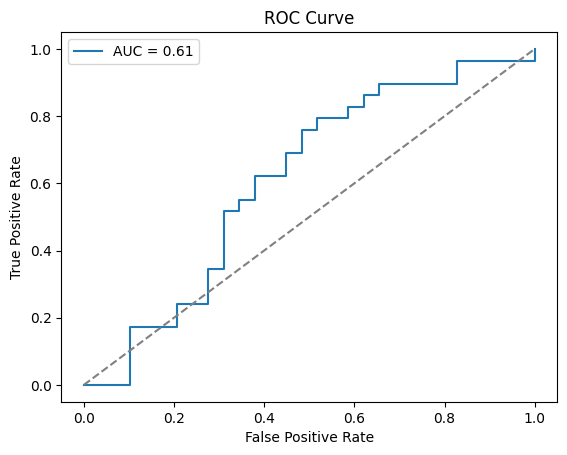

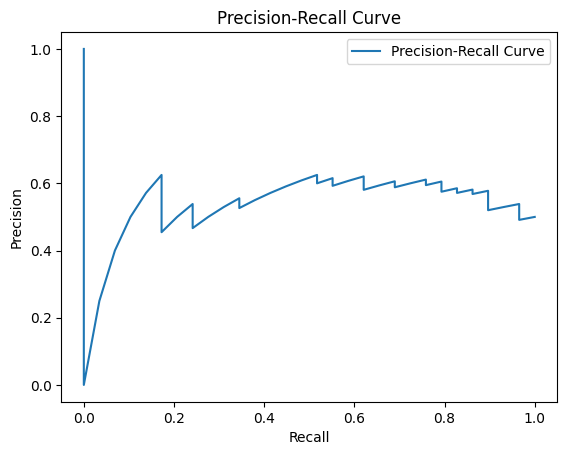

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
import seaborn as sns

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_prob.numpy())
print(f"AUC-ROC Score: {roc_auc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob.numpy())
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob.numpy())
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


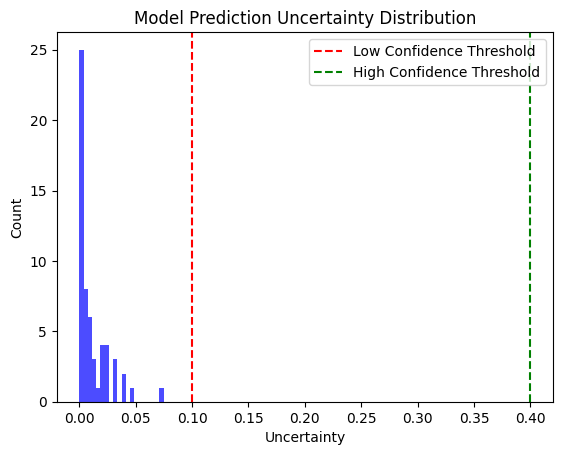

In [25]:
import numpy as np

# Calculate uncertainty (how close predictions are to 0.5)
uncertainty = np.abs(y_pred_prob.numpy() - 0.5)

# Visualize uncertain predictions
plt.hist(uncertainty, bins=20, alpha=0.7, color='blue')
plt.axvline(0.1, color='red', linestyle='dashed', label="Low Confidence Threshold")
plt.axvline(0.4, color='green', linestyle='dashed', label="High Confidence Threshold")
plt.xlabel("Uncertainty")
plt.ylabel("Count")
plt.title("Model Prediction Uncertainty Distribution")
plt.legend()
plt.show()


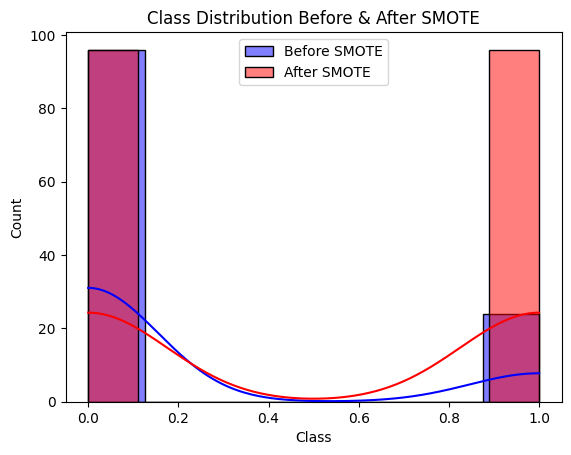

In [26]:
import seaborn as sns

# Before SMOTE
sns.histplot(y, kde=True, label="Before SMOTE", color="blue", alpha=0.5)
# After SMOTE
sns.histplot(y_smote, kde=True, label="After SMOTE", color="red", alpha=0.5)
plt.legend()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution Before & After SMOTE")
plt.show()


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Classical models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel="rbf", probability=True, random_state=42)

# Train classical models
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test)

# Print accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


Random Forest Accuracy: 0.9310344827586207
SVM Accuracy: 0.7413793103448276


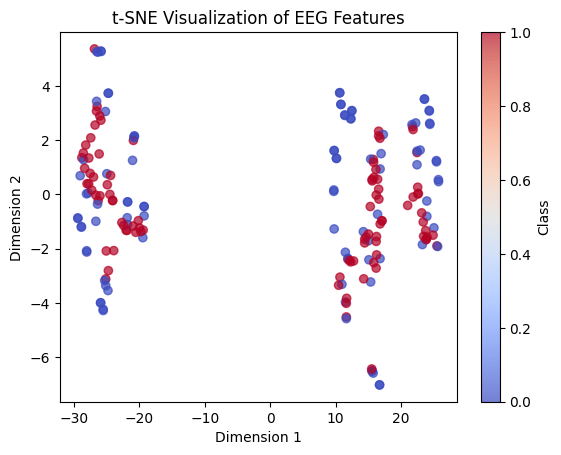

In [34]:
from sklearn.manifold import TSNE

# Reduce dimensionality to 2D
X_reduced = TSNE(n_components=2, perplexity=30).fit_transform(X_pca)

# Plot clusters
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_smote, cmap='coolwarm', alpha=0.7)
plt.title("t-SNE Visualization of EEG Features")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label="Class")
plt.show()



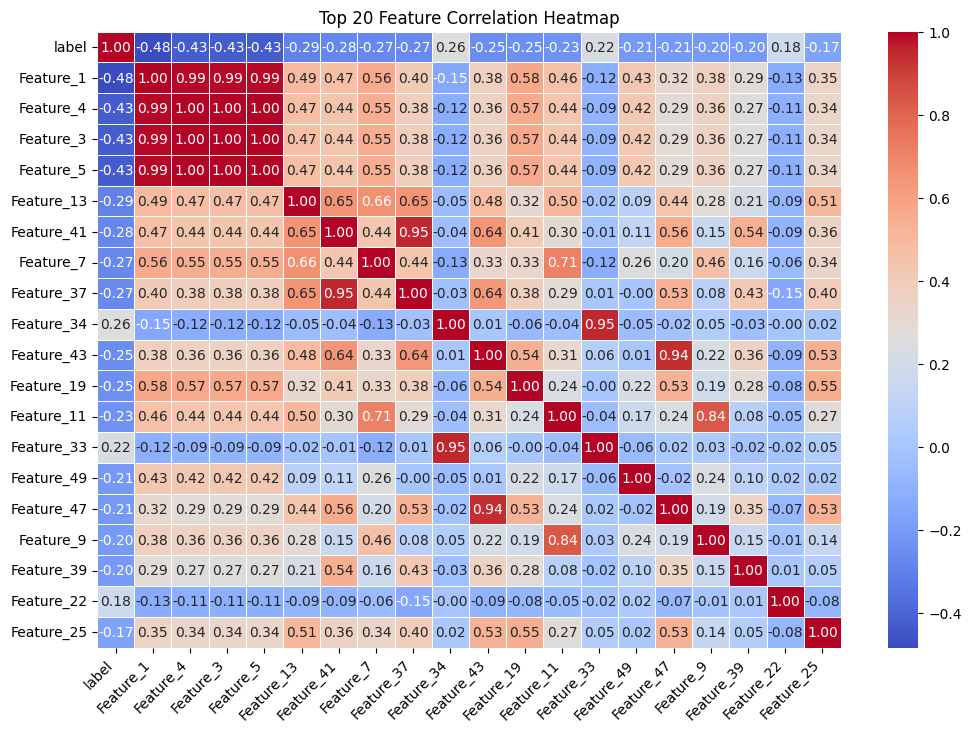

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute absolute correlation values
corr_matrix = feature_df.corr()

# Select Top 20 Features with Highest Correlation to the Label
top_features = corr_matrix["label"].abs().sort_values(ascending=False).index[:20]

# Subset the correlation matrix
corr_subset = corr_matrix.loc[top_features, top_features]

# Plot Improved Heatmap
plt.figure(figsize=(12, 8))  # Increase figure size
sns.heatmap(corr_subset, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Title
plt.title("Top 20 Feature Correlation Heatmap")

plt.show()
